# Wiki Scraping

In [2]:
from bs4 import BeautifulSoup
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url='https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page=req.get(url)

soup=BeautifulSoup(page.text, 'html')


In [23]:
soup.find('table')#, class_="class= wikitable sortable jquery-tablesorter")

<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Special

In [26]:
soup.find_all('table')[1]

In [27]:
table=soup.find_all('table')[1]


In [28]:
titles=table.find_all('th')
print(titles)


[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [29]:
w_title=[i.text.strip() for i in titles]
print(w_title)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [10]:
df=pd.DataFrame(columns=w_title)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [11]:
col_data=table.find_all('tr')

In [12]:
for j in col_data[1:]:
    row_data=j.find_all('td')
    in_row_data= [data.text.strip() for data in row_data]
    #print(in_row_data)
    leng=len(df)
    #print(leng)
    df.loc[leng]=in_row_data
    #df=in_row_data


In [13]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [14]:
df.to_csv(r'webb_scrapt.csv', index = False)

<AxesSubplot:xlabel='Revenue (USD millions)', ylabel='Count'>

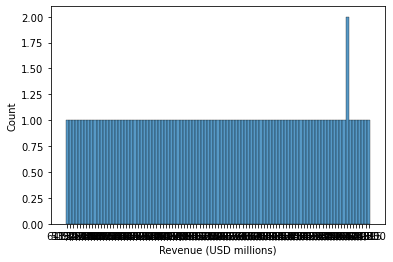

In [15]:
sns.histplot(df['Revenue (USD millions)'])

<AxesSubplot:xlabel='Employees', ylabel='Count'>

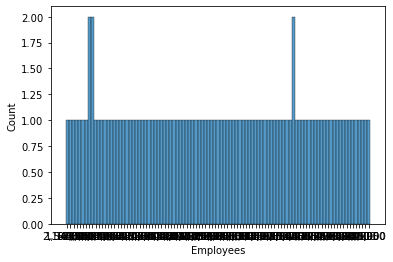

In [16]:
sns.histplot(df['Employees'])

<AxesSubplot:xlabel='Revenue growth', ylabel='Count'>

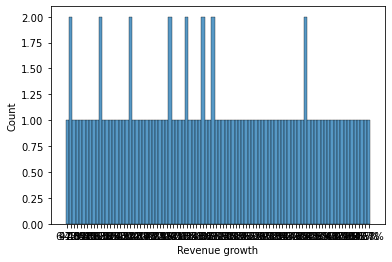

In [17]:
sns.histplot(df['Revenue growth'])

In [18]:

# removing '%'
print(df['Revenue growth'])
grow=df['Revenue growth']
grow = grow.str.replace('%', '')
grow

0      6.7%
1      9.4%
2     44.8%
3      7.8%
4     12.7%
      ...  
95    10.6%
96     0.5%
97    82.5%
98    14.5%
99    31.7%
Name: Revenue growth, Length: 100, dtype: object


0      6.7
1      9.4
2     44.8
3      7.8
4     12.7
      ... 
95    10.6
96     0.5
97    82.5
98    14.5
99    31.7
Name: Revenue growth, Length: 100, dtype: object

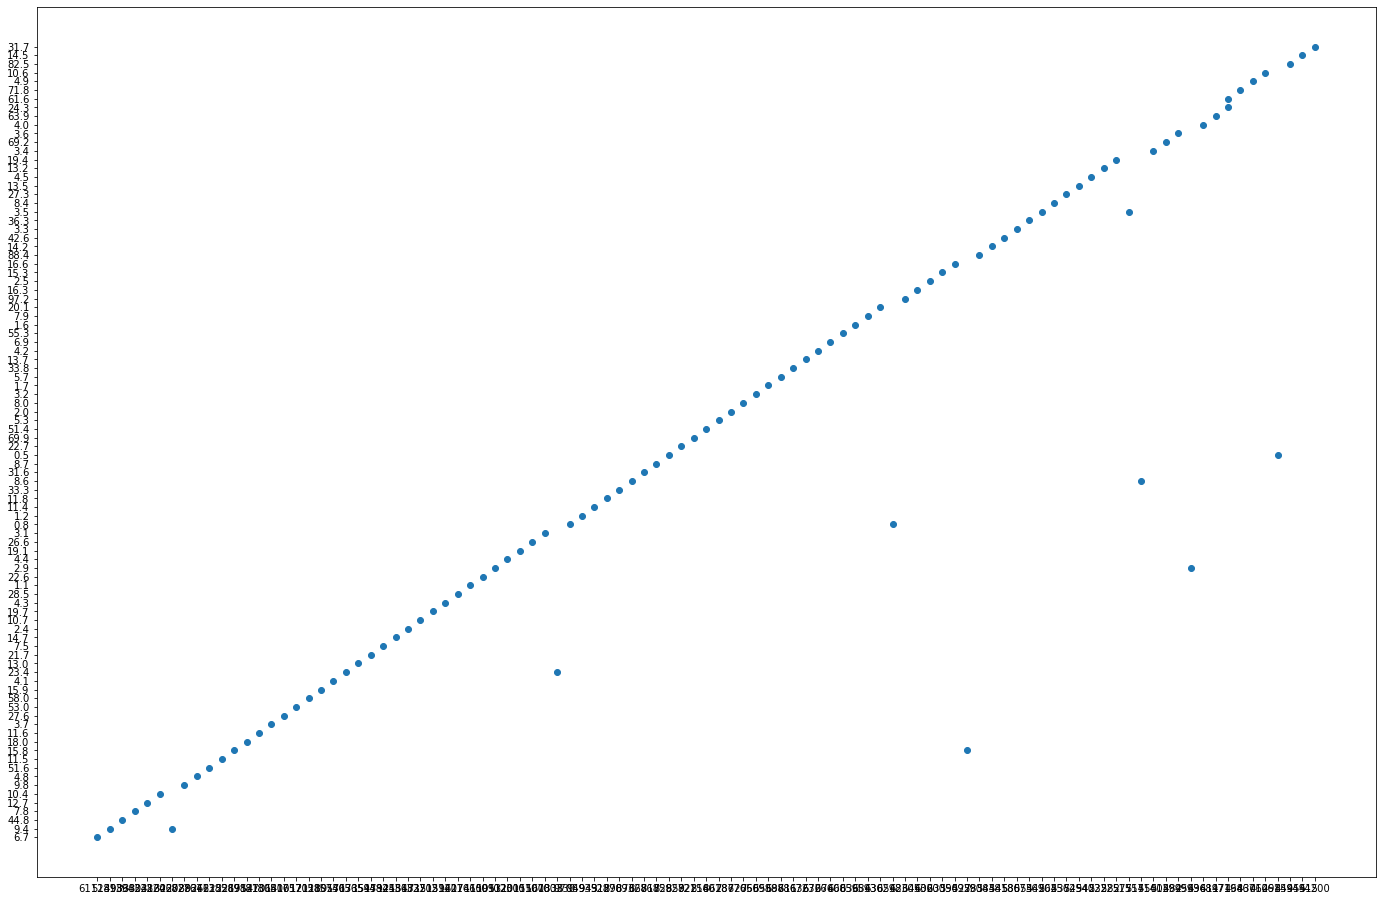

In [20]:

rev=df['Revenue (USD millions)']

rev = rev.str.replace(',', '')

#plt.plot(grow, aa)
#sns.histplot(grow)
plt.figure(figsize=(24,16))
plt.scatter(rev, grow)